<a href="https://colab.research.google.com/github/miamvmian/Sk-ML-FNO-Project-2024/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/miamvmian/Sk-ML-FNO-Project-2024.git

fatal: destination path 'Sk-ML-FNO-Project-2024' already exists and is not an empty directory.


In [2]:
import torch
import os
from pathlib import PurePath


cwd = os.getcwd()
p = PurePath(cwd)
flist = os.listdir()

mainfolder = 'Sk-ML-FNO-Project-2024'

# os.chdir('Sk-ML-FNO-Project-2024')
if p.parts[-1] != mainfolder and mainfolder in flist:
  os.chdir(mainfolder)
print(f"Current Folder is: {os.getcwd()}")

# from google.colab import drive
# drive.mount('/content/drive')

Current Folder is: /content/Sk-ML-FNO-Project-2024


In [4]:
from Model import FNO1d
modes = 16
width = 64
model = FNO1d(modes,width).double()
state_dict = torch.load("fno-1d-10layers.pth", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
# # generator test data
# from generator import gen_burgers_fisher_init_cond as init_cond
# from generator import gen_burgers_fisher_sol as true_sol

import numpy as np

def gen_burgers_fisher_init_cond(alpha=0, delta=2, b=0.3, n_pts=10000):
    a = 0.
    # b = 1.
    dx = (b - a) / (n_pts - 1)
    x = np.zeros(n_pts)
    x = np.asarray([a + k*dx for k in range(n_pts)])

    return (0.5 + 0.5*np.tanh((-alpha*delta/(delta+1)*0.5*x)))**(1./delta)

def gen_burgers_fisher_sol(
        alpha=1.,
        beta=0.0001,
        delta=2.,
        t=1.,
        b=0.3,
        n_pts=10000):
    a = 0.
    # b = 1.
    dx = (b - a) / (n_pts - 1)
    x = np.zeros(n_pts)
    x = np.asarray([a + k*dx for k in range(n_pts)])
    # arr = np.empty((n_time_slices, n_pts))

    # dt = t_max / (n_time_slices - 1)

    return (0.5 + 0.5*np.tanh((-alpha*delta/(delta+1)*0.5*(
                      x - (alpha/(delta+1) + beta*(delta+1)/alpha)*t))))**(1./delta)



np.random.seed(0)
delta = 2
beta = 0.0001

# produce different alphas
size=5
alpha_samples = np.random.uniform(-2, 2,size=size)

b = 1
n_pts = 10000


def t_sol():
  t = np.random.uniform(0.1, 1.5)
  init_cond = np.array([gen_burgers_fisher_init_cond(alpha=alphai, b=b, n_pts=n_pts)
          for alphai in alpha_samples])
  true_sol = np.array([gen_burgers_fisher_sol(alpha=alphai, t=t, b=b, n_pts=n_pts)
          for alphai in alpha_samples])
  return t, init_cond, true_sol


t, init_cond, true_sol = t_sol()

In [13]:
func_test = torch.from_numpy(init_cond)
test = func_test.to(torch.double)
func_test = test.reshape(*func_test.shape, 1)
# func_test = func_test.cuda()

model_res = model.forward(func_test)
model_res = model_res.detach().cpu().numpy()

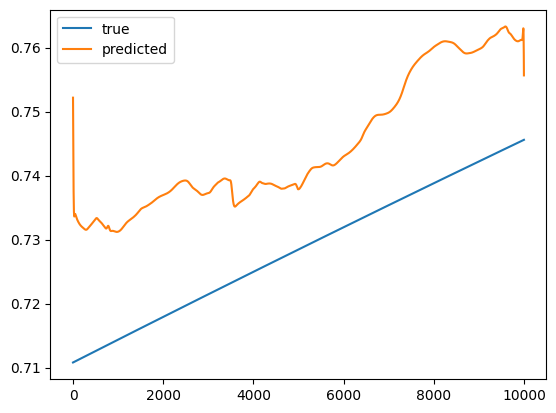

In [15]:
import matplotlib.pyplot as plt
plt.plot(true_sol[4],label="true")
plt.plot(model_res[4],label="predicted")
plt.legend()